EXPERIMENT 1

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split


In [43]:
knc=KNeighborsClassifier(n_neighbors=5)

In [44]:
data=load_iris()
X=data.data
Y=data.target

In [45]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [46]:
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
y_pred=knc.predict(x_test)

In [48]:
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        print("Correct.")
    else:
        print("Wrong")

Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.
Correct.


In [49]:
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  1.0


In [50]:
print("Confusion Matrix : ",confusion_matrix(y_test,y_pred))

Confusion Matrix :  [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


EXPERIMENT 2

In [51]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [52]:
dataset=load_iris()

In [53]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [54]:
dataset.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [55]:
X=pd.DataFrame(dataset.data)
X.columns=['sepal_length','sepal_width','petal_length','petal_width']

In [56]:
Y=pd.DataFrame(dataset.target)
Y.columns=['Targets']

In [57]:
plt.figure(figsize=(14,10))
colormap=np.array(['red','lime','black'])

<Figure size 1400x1000 with 0 Axes>

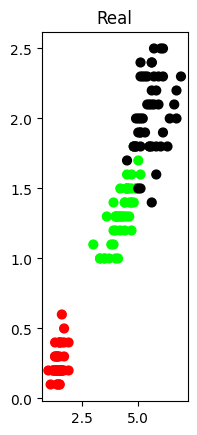

In [58]:
# REAL PLOT
plt.subplot(1,3,1)
plt.title('Real')
plt.scatter(X.petal_length,X.petal_width,c=colormap[Y.Targets],s=40)


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


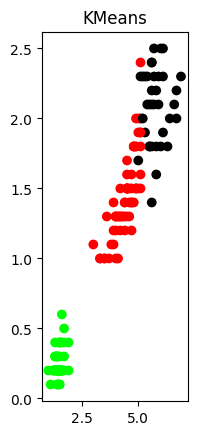

In [59]:
# K-PLOT
model=KMeans(n_clusters=3, random_state=0).fit(X)
plt.subplot(1,3,2)
plt.title('KMeans')
plt.scatter(X.petal_length,X.petal_width,c=colormap[model.labels_])

print('The accuracy score of K-Mean: ',metrics.accuracy_score(Y, model.labels_))
print('The Confusion matrixof K-Mean:\n',metrics.confusion_matrix(Y, model.labels_))


The accuracy score of EM:  0.3333333333333333
The Confusion matrix of EM:
  [[ 0 50  0]
 [45  0  5]
 [ 0  0 50]]


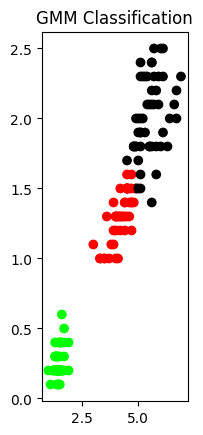

In [60]:
# GMM PLOT
gmm=GaussianMixture(n_components=3, random_state=0).fit(X)
y_cluster_gmm=gmm.predict(X)
plt.subplot(1,3,3)
plt.title('GMM Classification')
plt.scatter(X.petal_length,X.petal_width,c=colormap[y_cluster_gmm])

print('The accuracy score of EM: ',metrics.accuracy_score(Y, y_cluster_gmm))
print('The Confusion matrix of EM:\n ',metrics.confusion_matrix(Y, y_cluster_gmm))


EXPERIMENT 3

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [62]:
def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

In [63]:
def localWeight(point, xmat, ymat, k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

In [64]:
def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

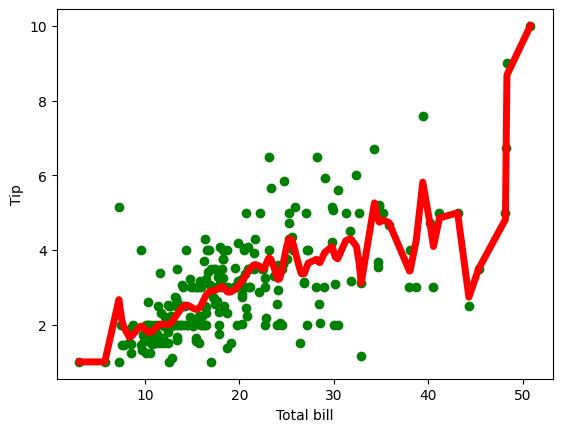

In [65]:
# load data points
data = pd.read_csv('10-dataset.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)
 
#preparing and add 1 in bill
mbill = np.mat(bill)
mtip = np.mat(tip)

m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T))

#set k here
ypred = localWeightRegression(X,mtip,0.5)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='green')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();

OR

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from moepy import lowess

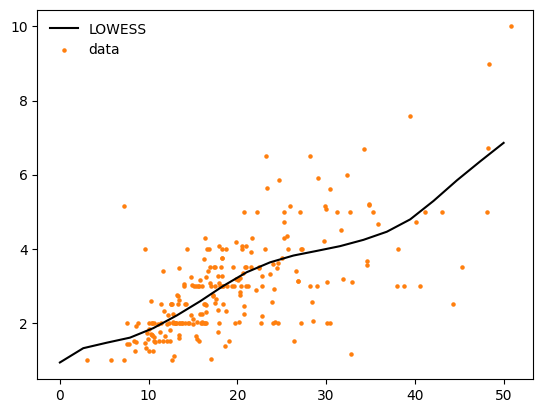

In [67]:
data = pd.read_csv('10-dataset.csv')
x=np.array(data.total_bill)
y=np.array(data.tip)

#Model fitting
lowess_model = lowess.Lowess()
lowess_model.fit(x,y)

#Model Prediction
x_pred = np.linspace(0,50,20)
y_pred = lowess_model.predict(x_pred)

#Plotting'
plt.plot(x_pred,y_pred,"-",label="LOWESS",color='k',zorder=3)
plt.scatter(x,y,label='data',color='C1',s=5,zorder=1)
plt.legend(frameon=False)

EXPERIMENT 4

In [15]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) #maximum of X array longitudinally
y = y/100

In [16]:
#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [17]:
#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

In [18]:
#Variable initialization
epoch=5 #Setting training iterations
lr=0.1 #Setting learning rate

In [19]:
inputlayer_neurons = 2 #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer
#weight and bias initialization


In [20]:
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

In [21]:
#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
    #Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+bout
    output = sigmoid(outinp)
    
    #Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act)#how much hidden layer wts contributed to error
    d_hiddenlayer = EH * hiddengrad
    
    wout += hlayer_act.T.dot(d_output) *lr   # dotproduct of nextlayererror and currentlayerop
    wh += X.T.dot(d_hiddenlayer) *lr
    
    print ("-----------Epoch-", i+1, "Starts----------")
    print("Input: \n" + str(X)) 
    print("Actual Output: \n" + str(y))
    print("Predicted Output: \n" ,output)
    print ("-----------Epoch-", i+1, "Ends----------\n")
     

-----------Epoch- 1 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.86639502]
 [0.8574679 ]
 [0.86626687]]
-----------Epoch- 1 Ends----------

-----------Epoch- 2 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.86657426]
 [0.85764085]
 [0.86644858]]
-----------Epoch- 2 Ends----------

-----------Epoch- 3 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.86675191]
 [0.8578123 ]
 [0.86662869]]
-----------Epoch- 3 Ends----------

-----------Epoch- 4 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.86692801]
 [0.85798226]
 [0.866

In [22]:
print("Input: \n" + str(X)) 
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.86710257]
 [0.85815075]
 [0.86698417]]


EXPERIMENT 5

In [6]:
import random
import numpy as np



def init_population(pop_size, genome_size):  # initialize the population of bit vectors
    return [random.choices(range(2), k=genome_size) for _ in range(pop_size)]

In [2]:
def fitness(individual):  # an individual's fitness is the number of 1s
    return sum(individual)


In [3]:
def selection(population, fitnesses):  # tournament selection
    tournament = random.sample(range(len(population)), k=3)
    tournament_fitnesses = [fitnesses[i] for i in tournament]
    winner_index = tournament[np.argmax(tournament_fitnesses)]
    return population[winner_index]

In [4]:
def crossover(parent1, parent2):  # single-point crossover
    xo_point = random.randint(1, len(parent1) - 1)
    return ([parent1[:xo_point] + parent2[xo_point:],
             parent2[:xo_point] + parent1[xo_point:]])

def mutation(individual):  # bitwise mutation with probability 0.1
    for i in range(len(individual)):
        if random.random() < 0.1:
            individual = individual[:i] + [1-individual[i]] + individual[i + 1:]
    return individual


In [7]:
pop_size, genome_size = 6, 5
population = init_population(pop_size, genome_size)  # generation 0

for gen in range(10):
    fitnesses = [fitness(individual) for individual in population]
    print('Generation ', gen, '\n', list(zip(population, fitnesses)))
    nextgen_population = []
    for i in range(int(pop_size / 2)):
        parent1 = selection(population, fitnesses)  # select first parent
        parent2 = selection(population, fitnesses)  # select second parent
        offspring1, offspring2 = crossover(parent1, parent2)  # perform crossover between both parents
        nextgen_population += [mutation(offspring1), mutation(offspring2)]  # mutate offspring
    population = nextgen_population

Generation  0 
 [([1, 0, 0, 0, 0], 1), ([1, 0, 0, 0, 0], 1), ([1, 1, 1, 1, 0], 4), ([0, 1, 0, 1, 1], 3), ([1, 1, 1, 1, 0], 4), ([1, 0, 0, 1, 1], 3)]
Generation  1 
 [([1, 1, 1, 1, 0], 4), ([1, 1, 1, 1, 0], 4), ([1, 0, 1, 1, 0], 3), ([1, 1, 0, 1, 1], 4), ([0, 1, 1, 1, 1], 4), ([1, 1, 0, 1, 0], 3)]
Generation  2 
 [([1, 1, 1, 1, 1], 5), ([0, 1, 1, 1, 0], 3), ([1, 1, 1, 1, 0], 4), ([1, 1, 1, 0, 0], 3), ([0, 1, 1, 1, 1], 4), ([1, 1, 0, 1, 1], 4)]
Generation  3 
 [([1, 1, 0, 0, 1], 3), ([1, 1, 0, 1, 1], 4), ([1, 1, 0, 0, 0], 2), ([1, 1, 1, 1, 1], 5), ([0, 1, 0, 1, 1], 3), ([0, 1, 1, 1, 1], 4)]
Generation  4 
 [([1, 1, 0, 1, 1], 4), ([1, 1, 1, 1, 1], 5), ([1, 1, 0, 1, 1], 4), ([0, 0, 0, 1, 1], 2), ([1, 1, 1, 1, 1], 5), ([0, 1, 0, 1, 1], 3)]
Generation  5 
 [([1, 0, 0, 1, 1], 3), ([1, 1, 0, 1, 1], 4), ([1, 1, 1, 1, 1], 5), ([1, 1, 1, 1, 0], 4), ([1, 1, 0, 1, 1], 4), ([1, 1, 1, 1, 1], 5)]
Generation  6 
 [([1, 1, 1, 1, 1], 5), ([0, 0, 1, 1, 1], 3), ([1, 1, 0, 1, 1], 4), ([1, 1, 1, 1, 1], 5), (

EXPERIMENT 6


In [8]:
import numpy as np
import pylab as plt

In [9]:
points_list =[(0,1),(1,5),(5,6),(5,4),(1,2),(2,3),(2,7)]

In [10]:
goal = 7


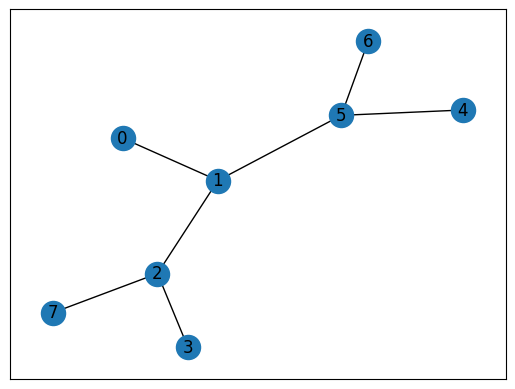

In [42]:
import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [30]:
MATRIX_SIZE = 8

R = np.matrix(np.ones(shape=(MATRIX_SIZE,MATRIX_SIZE)))
R*=-1

In [31]:
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] =100
    else:
        R[point]=0
    
    if point[0] == goal:
        R[point[::-1]]=100
    else:
        R[point[::-1]]=0
        
R[goal,goal]=100

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [32]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

In [33]:
gamma=0.8

In [34]:
initial_state=1

In [35]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >=0)[1]
    return av_act


In [36]:
available_act = available_actions(initial_state
                                 )

In [37]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

In [38]:
action = sample_next_action(available_act)

In [39]:
def update(current_state, action,gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index,size=1))
    else:
        max_index=int(max_index)
    max_value=Q[action,max_index]
    
    Q[current_state,action]=R[current_state,action] +gamma*max_value
    print('max_value',R[current_state,action]+gamma*max_value)
    
    if(np.max(Q)>0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return(0)
    
update(initial_state,action,gamma)

max_value 0.0


0

In [40]:
scores =[]

for i in range(700):
    current_state=np.random.randint(0,int(Q.shape[0]))
    available_act = available_actions(current_state)
    action =sample_next_action(available_act)
    score=update(current_state,action,gamma)
    scores.append(score)
    print("Score : ",str(score))
print("Trained Q Matrix:")
print(Q/np.max(Q)*100)

current_state=0
steps=[current_state]

max_value 0.0
Score :  0
max_value 0.0
Score :  0
max_value 0.0
Score :  0
max_value 100.0
Score :  100.0
max_value 100.0
Score :  200.0
max_value 80.0
Score :  280.0
max_value 64.0
Score :  344.0
max_value 0.0
Score :  344.0
max_value 180.0
Score :  235.55555555555554
max_value 0.0
Score :  235.55555555555554
max_value 80.0
Score :  280.0
max_value 0.0
Score :  280.0
max_value 0.0
Score :  280.0
max_value 64.0
Score :  280.0
max_value 244.0
Score :  232.78688524590163
max_value 0.0
Score :  232.78688524590163
max_value 0.0
Score :  232.78688524590163
max_value 0.0
Score :  232.78688524590163
max_value 295.20000000000005
Score :  209.7560975609756
max_value 0.0
Score :  209.7560975609756
max_value 336.1600000000001
Score :  196.3826749167063
max_value 0.0
Score :  196.3826749167063
max_value 368.92800000000005
Score :  251.8345042935207
max_value 295.14240000000007
Score :  331.8345042935207
max_value 0.0
Score :  331.8345042935207
max_value 0.0
Score :  331.8345042935207
max_value 236

max_value 385.92625116446726
Score :  971.9883568562027
max_value 385.92625116446726
Score :  971.9883568562027
max_value 385.92625116446726
Score :  971.9883568562027
max_value 385.92625116446726
Score :  971.9883568562027
max_value 241.92625116446726
Score :  971.9883568562027
max_value 485.92625116446726
Score :  965.6745669073707
max_value 241.92625116446726
Score :  965.6745669073707
max_value 308.7410009315738
Score :  966.9778895743008
max_value 388.7410009315738
Score :  967.5571440929363
max_value 246.99280074525905
Score :  968.5998022264804
max_value 193.54100093157382
Score :  970.8082100787784
max_value 246.99280074525905
Score :  971.8508682123224
max_value 246.99280074525905
Score :  972.8935263458665
max_value 246.99280074525905
Score :  972.8935263458665
max_value 310.99280074525905
Score :  973.3569299607749
max_value 197.59424059620724
Score :  974.1910564676101
max_value 310.99280074525905
Score :  974.6544600825185
max_value 197.59424059620724
Score :  974.65446008

Most Efficient Path: 
[0, 1, 2, 7]


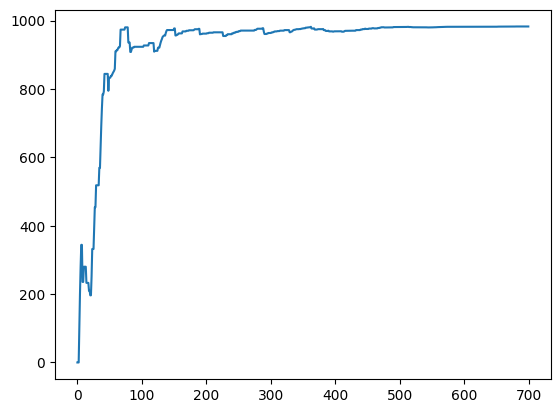

In [41]:
while current_state !=7:
    next_step_index = np.where(Q[current_state,]==np.max(Q[current_state]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index
    
    
    
print("Most Efficient Path: ")
print(steps)


plt.plot(scores)
plt.show()